<a href="https://colab.research.google.com/github/RistovaRadica/SI2023/blob/master/Copy_of_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import warnings
from datetime import date
import random
import matplotlib.pyplot as plt
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [2]:
url = "https://mobelix.com.mk/mk/mobilni-telefoni"
url_view = requests.get(url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [3]:

url_view

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [4]:
raw_html = url_view.text
soup = BeautifulSoup(raw_html, "html.parser")

**Print the HTML code that you get**

In [5]:

print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [6]:
first_phone=soup.select_one("div.tab-col")
brand=first_phone.select_one("h5.mb-0").text
typee=first_phone.select_one("h3.h5.font-weight-normal").text
price=first_phone.select_one("p.h5.price").text
print(brand,typee,price)

Blackberry Porsche Design P9981 19,000.00 ден


**Add as many codeboxes as you need for selecting all the html elements**

In [7]:
mobile_cards=soup.find_all("div",class_="tab-col")
list=[]
count_none=0
for i in range(0,len(mobile_cards)):
  item={}
  phone_brand=mobile_cards[i].select_one("h5.mb-0")
  if phone_brand is None:
    count_none+=1
    item['Phone Brand']="None"
  else:
    item['Phone Brand']=phone_brand.text
  phone_type=mobile_cards[i].select_one("h3.h5.font-weight-normal")
  if phone_type is None:
    count_none+=1
    item['Phone Type']="None"
  else:
    item['Phone Type']=phone_type.text
  price=mobile_cards[i].select_one("p.h5.price br")
  if price is None:
    item['Price']=mobile_cards[i].select_one("p.h5.price").text
  else:
    item['Price']=price.next_sibling.strip()
  list.append(item)

**Create lists with the extracted data from the html elements that you selected**

In [8]:
# list.append(item)

**Print all lists that are containing the elements**

In [9]:
list

[{'Phone Brand': 'Blackberry',
  'Phone Type': 'Porsche Design P9981',
  'Price': '19,000.00 ден'},
 {'Phone Brand': 'Samsung',
  'Phone Type': 'Galaxy A03s 4/64GB',
  'Price': '8,300.00 ден'},
 {'Phone Brand': 'Samsung',
  'Phone Type': 'Galaxy A04s 3/32GB',
  'Price': '8,300.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 14 Pro Max 128GB E-SIM',
  'Price': '61,500.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 14 Pro 512GB',
  'Price': '89,200.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 14 Pro Max 512GB',
  'Price': '78,100.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 14 Pro Max 1TB',
  'Price': '98,400.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 14 Pro 128GB E-SIM',
  'Price': '55,300.00 ден'},
 {'Phone Brand': 'Apple',
  'Phone Type': 'iPhone 13 Mini 256GB',
  'Price': '46,800.00 ден'}]

**Check if all lists are the same size**

In [10]:
if count_none is 0:
  print("They are the same size")
else:
  print("Not the same size")

They are the same size


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [11]:
df = pd.DataFrame(list)

**Print the dataset you obtain**

In [13]:
print(df)

  Phone Brand                     Phone Type          Price
0  Blackberry           Porsche Design P9981  19,000.00 ден
1     Samsung             Galaxy A03s 4/64GB   8,300.00 ден
2     Samsung             Galaxy A04s 3/32GB   8,300.00 ден
3       Apple  iPhone 14 Pro Max 128GB E-SIM  61,500.00 ден
4       Apple            iPhone 14 Pro 512GB  89,200.00 ден
5       Apple        iPhone 14 Pro Max 512GB  78,100.00 ден
6       Apple          iPhone 14 Pro Max 1TB  98,400.00 ден
7       Apple      iPhone 14 Pro 128GB E-SIM  55,300.00 ден
8       Apple           iPhone 13 Mini 256GB  46,800.00 ден


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [14]:
df["Price"] = df["Price"].str.replace('[^\d.]', '', regex=True).astype(float)
mean_price =df["Price"].mean()
median_price = df["Price"].median()
std_deviation_price = df["Price"].std()
min_price = df["Price"].min()
max_price = df["Price"].max()
print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Standard Deviation of Price:", std_deviation_price)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

Mean Price: 51655.555555555555
Median Price: 55300.0
Standard Deviation of Price: 34010.112875110804
Minimum Price: 8300.0
Maximum Price: 98400.0


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

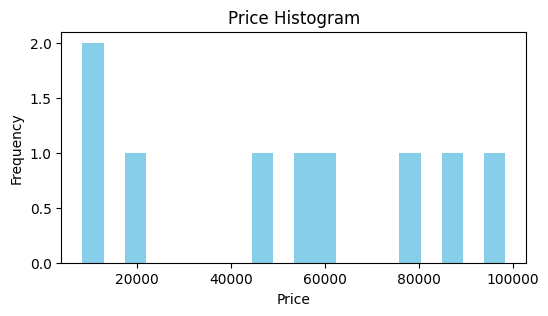

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(df["Price"],bins=20,color='skyblue')
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

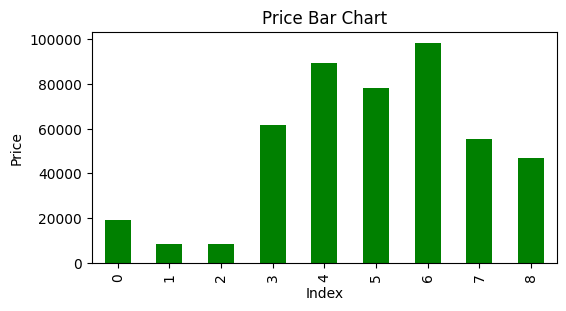

In [16]:
plt.figure(figsize=(6, 3))
df["Price"].plot(kind="bar", color='green')
plt.title("Price Bar Chart")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()